In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

# Load & Inspection

In [38]:
path = r"Skyserver.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# Data Cleaning

In [39]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 10000 rows and 18 columns.


In [41]:
df["class"].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [43]:
# checking for correlations numerically
corr = df.corr()
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra,NaN,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,NaN,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,NaN,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,NaN,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,NaN,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,NaN,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,NaN,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,NaN,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Numerical Correlations of Stellar Observations')

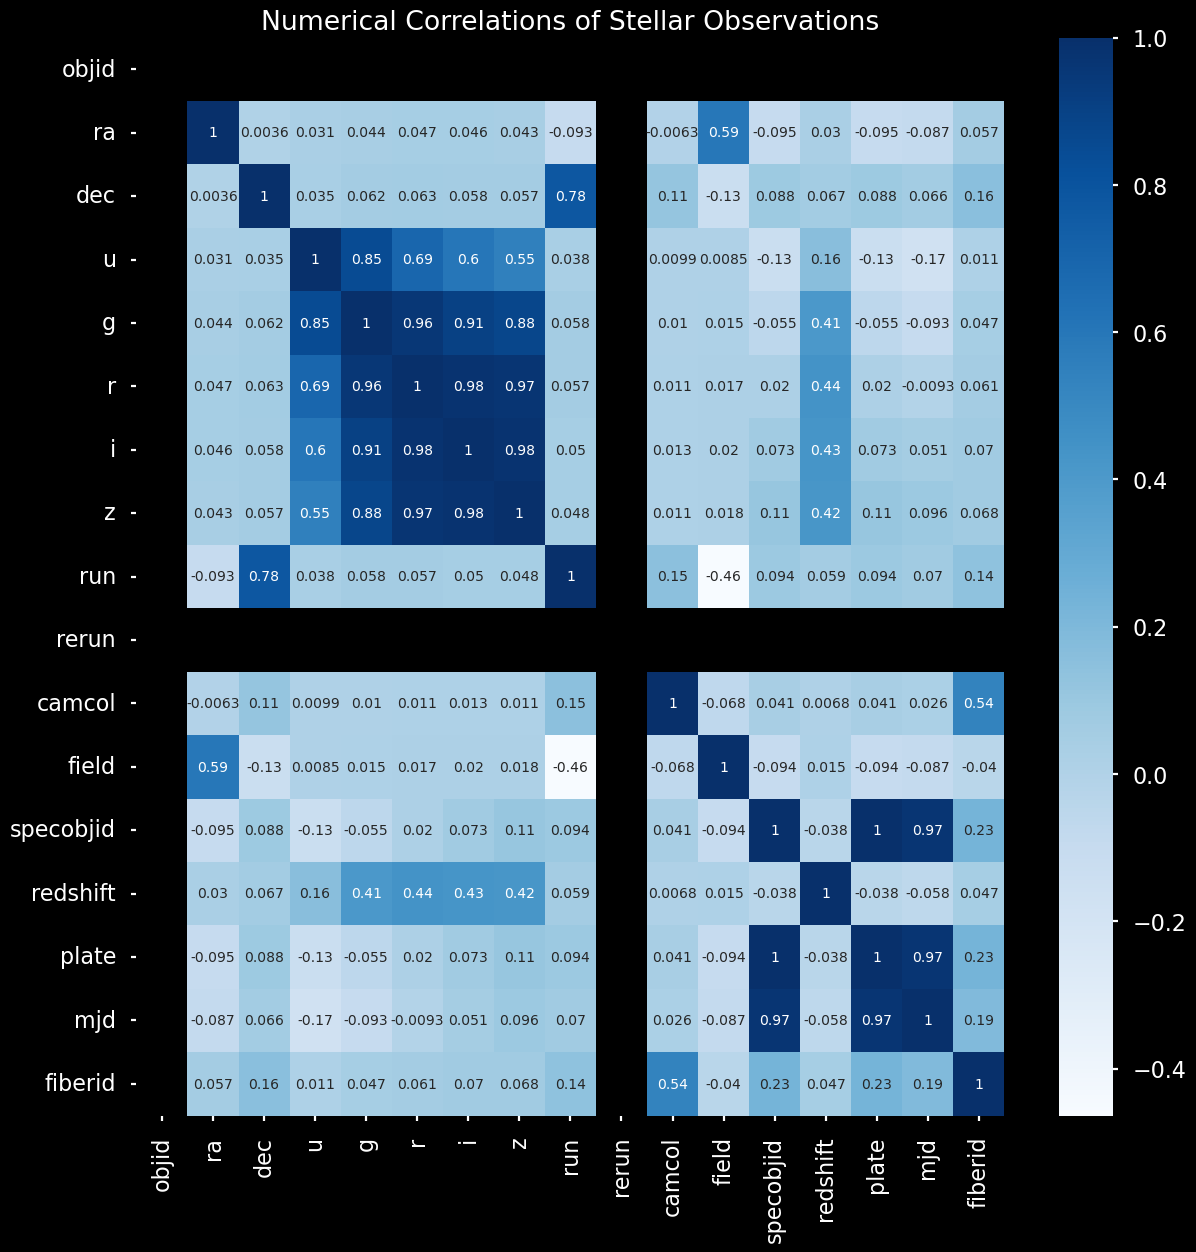

In [49]:
# generating a heatmap of correlations
fig, ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(corr, cmap = "Blues", annot = True)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_title("Numerical Correlations of Stellar Observations")

Text(0.5, 1.0, 'Stellar Observation Class')

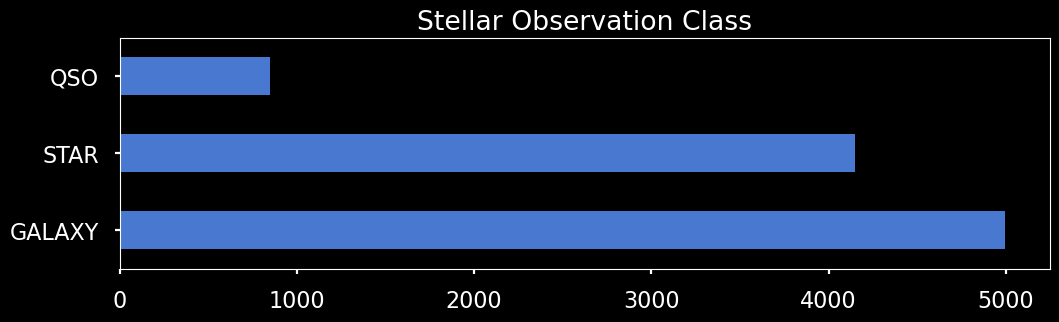

In [51]:
# generating a bar graph of star color
fig, ax = plt.subplots(figsize=(12,3))
ax = df["class"].value_counts().plot(kind = "barh")
ax.set_title("Stellar Observation Class")